# **Exploratory Data Analysis**

In [ ]:
# Importing the required libraries
import numpy as np # numerical python
import pandas as pd # data processingz
import seaborn as sns # For creating plots
import matplotlib.pyplot as plt # For creating plots

In [ ]:
# Creating a pandas dataframe using the dataset
df = pd.read_csv('Churn-Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Printing the datatype of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum() #detecting missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.dropna(inplace = True) #Removing missing values
df2 = df.iloc[:,1:] #Remove customer IDs from the data set

# Replacing 'Yes' with 1 and 'No' with 0 in the 'Churn' column
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

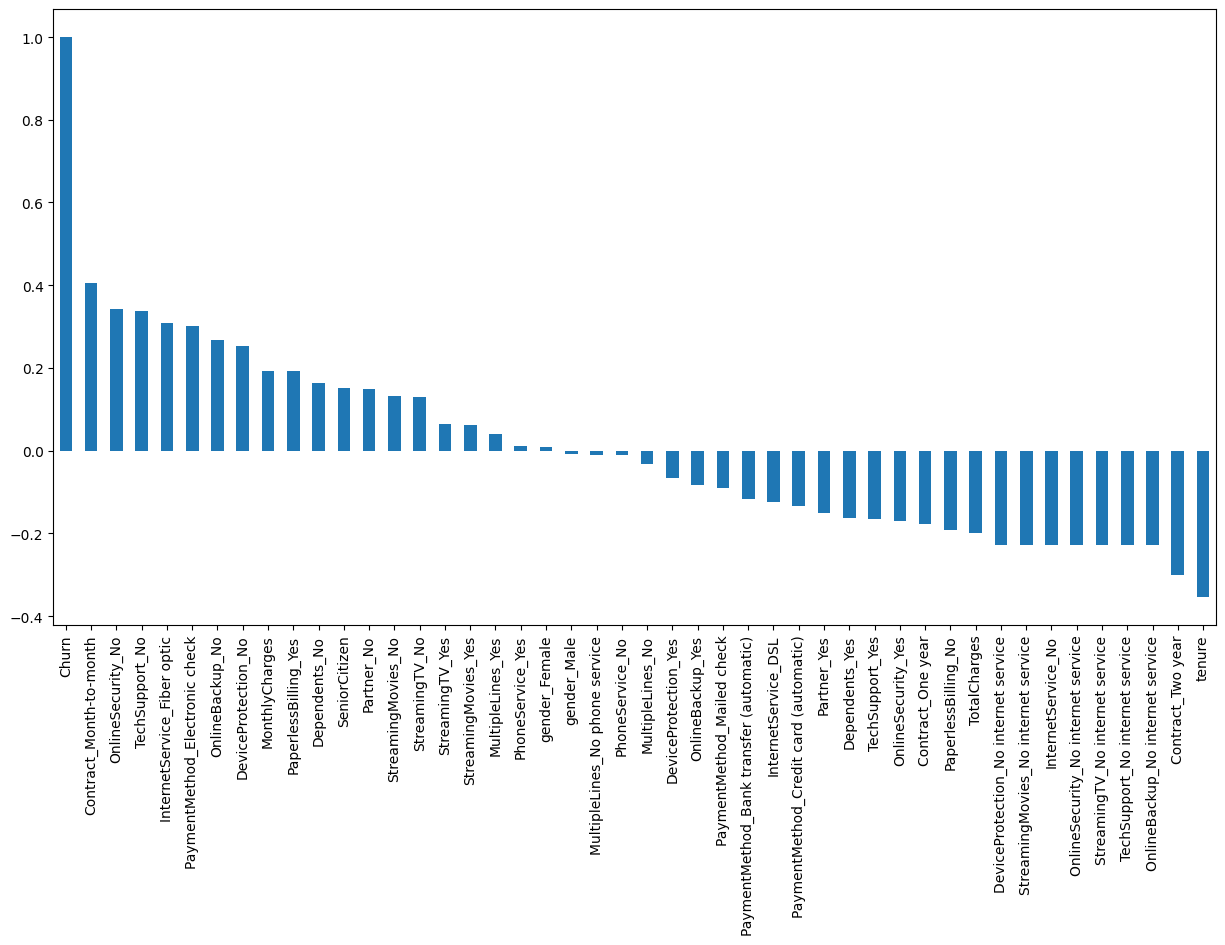

In [ ]:
#Getting Correlation of Churn with other variables using bar plot
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

During my analysis, I found that month-to-month contracts and the absence of online security and tech support are positively correlated with churn. On the other hand, I noticed that longer tenure and two-year contracts show a negative correlation with churn.

Additionally, I discovered that certain services such as online security, streaming TV, online backup, and tech support, which do not require an internet connection, are negatively associated with churn.

Before procedding with the modeling and identification of important variables, I will further explore these patterns and correlations to gain a deeper understanding.

## Data Exploration

Let's begin by exploring our dataset to gain insights into the patterns and potentially form some hypotheses. We will start by examining the distribution of individual variables and then analyze the data further for any interesting trends.


###  A. **Distribution of various services used by customers**

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

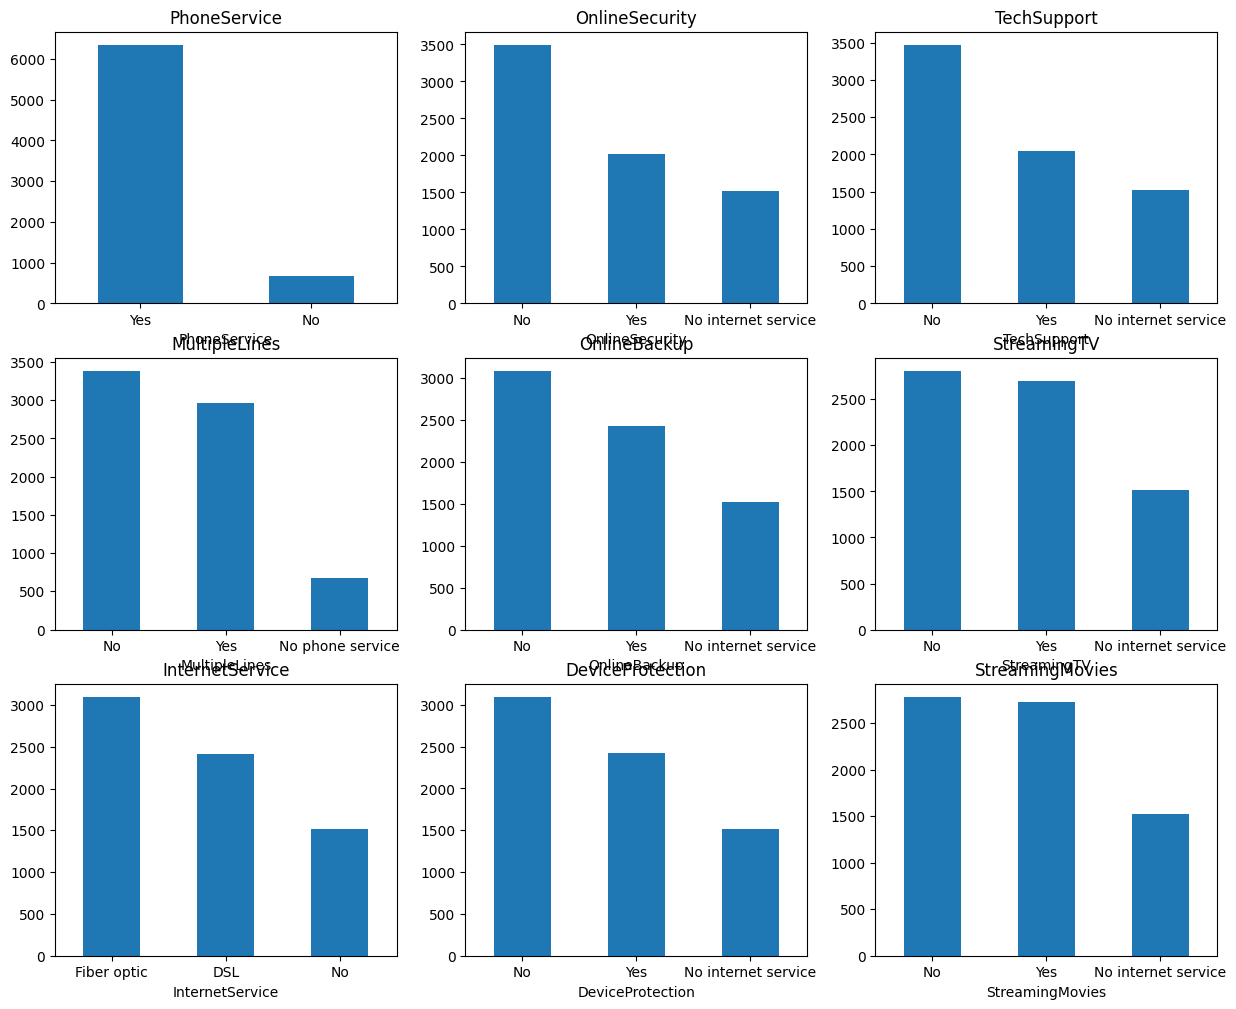

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### B.) **Demographics** - Let's understand the gender, age range, partner, and dependent status of the customers.


1. **Senior Citizens** - the data reveals that only 16.2% of the customers in our dataset are senior citizens. This indicates that the majority of our customers are younger individuals.

Text(0, 0.5, '% Senior Citizens')

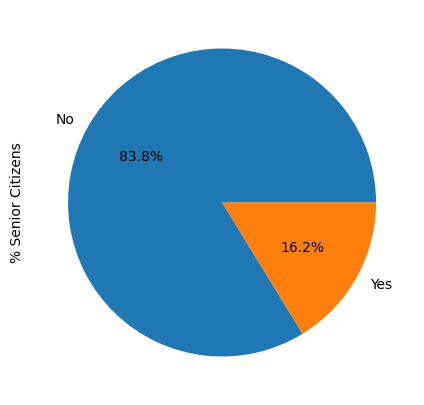

In [ ]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 10 )
ax.set_ylabel('% Senior Citizens',fontsize = 10)

2. **Partner and dependents**  - Based on the data, approximately 50% of the customers have a partner, indicating that they are in a relationship or married. On the other hand, only 30% of the total customers have dependents, suggesting that they have children or other individuals who rely on their services.
Also, it is worth noting that approximately half of the customers with partners have dependents, while the remaining half do not. Moreover, a significant majority (80%) of customers without partners do not have any dependents.

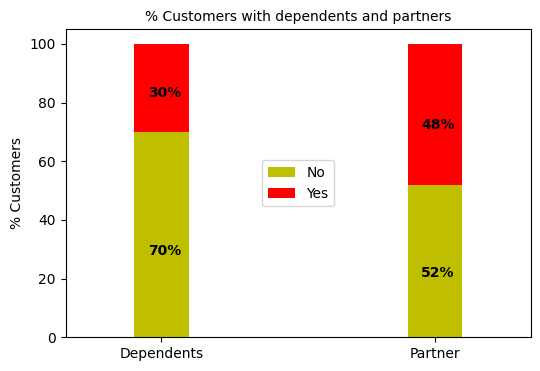

In [ ]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=['y','r'], figsize=(6,4),rot = 0,width = 0.2)

ax.set_ylabel('% Customers',size = 10)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 10)
ax.legend(loc = 'center',prop={'size':10})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'black',weight = 'bold',size = 10)

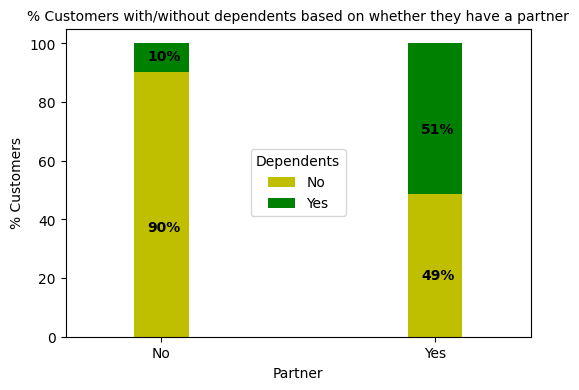

In [ ]:
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar', width = 0.2,stacked = True, rot = 0, figsize = (6,4), color = ['y','g'])
ax.legend(loc='center',prop={'size':10},title = 'Dependents',fontsize =10)
ax.set_ylabel('% Customers',size = 10)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 10)
ax.xaxis.label.set_size(10)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'black',weight = 'bold',size = 10)

3. **Gender Distribution** - Approximately half of the customers in our dataset are male, while the remaining half are female.

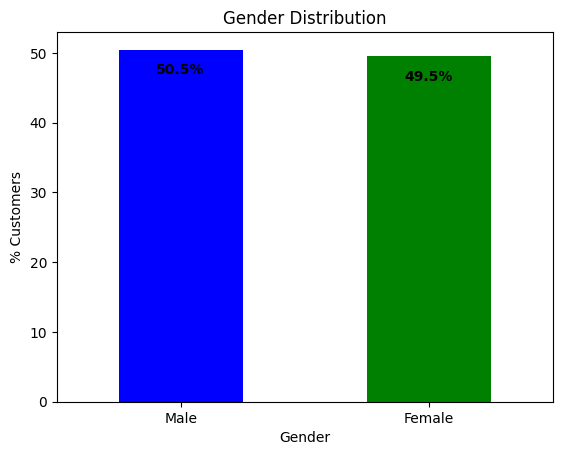

In [ ]:
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,rot = 0,color = ['b','g'])
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = [] #list to collect the data from plt.patches
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',fontsize=10,color='black',weight = 'bold')

Interestingly,  among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents.
Additionally, as expected, among the customers who do not have any partner, a majority (80%) of them do not have any dependents .

Additionally, when examining the distribution of customers with and without dependents and partners based on gender, there were no noticeable differences. The percentages of customers with or without dependents and partners appeared to be consistent across gender groups. Similarly, there was no discernible difference in senior citizen status based on gender.

### C.) **Relationship between monthly and total charges**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

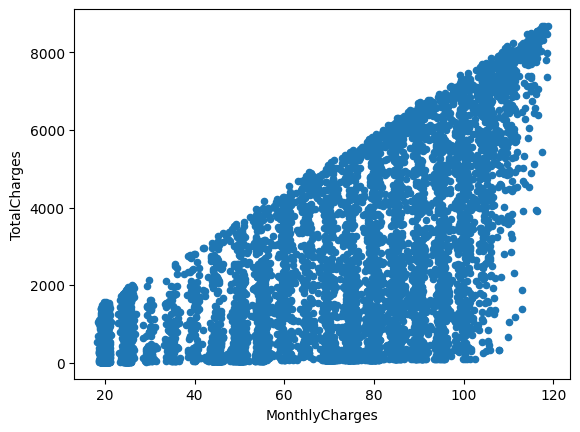

In [ ]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')

The scatter plot indicates a positive relationship between monthly charges and total charges. As monthly charges increase, there is a corresponding increase in total charges. This suggests that there is a direct and proportional relationship between the two variables. Customers who have higher monthly charges tend to accumulate higher total charges over time. This relationship can be further explored and analyzed to understand the specific factors driving the increase in charges and identify any potential patterns or trends within the data.

### D.) **Customer Account Information**:  

**1. Contracts:** Its apparent that the majority of customers have opted for a month-to-month contract. There is an equal distribution of customers between the 1-year and 2-year contract options. This suggests that a significant portion of customers prefer the flexibility of a month-to-month agreement, while others opt for longer-term commitments.


Text(0.5, 1.0, '# of Customers by Contract Type')

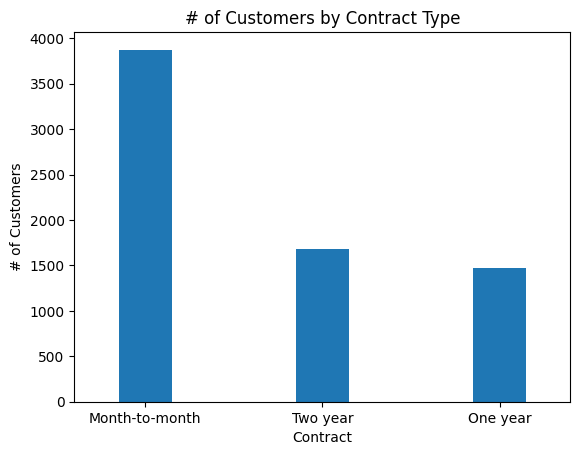

In [ ]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Below we will understand the tenure of customers based on their contract type.

<ipython-input-15-3d256f2d09a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],hist=True, kde=False,bins=int(180/5), color = 'cyan',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax1)
<ipython-input-15-3d256f2d09a2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

Text(0.5, 1.0, 'Two Year Contract')

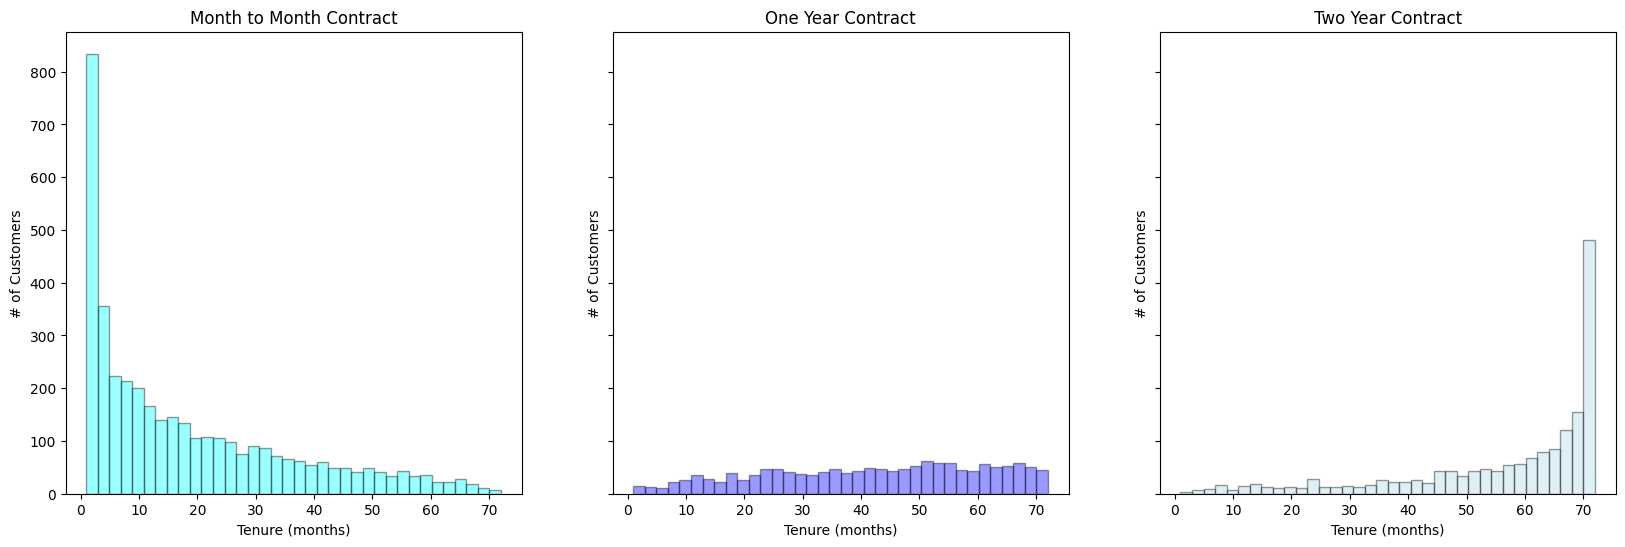

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],hist=True, kde=False,bins=int(180/5), color = 'cyan',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],hist=True, kde=False,bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax2)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],hist=True, kde=False,bins=int(180/5), color = 'lightblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax3)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Most monthly contracts last for 1-2 months, while 2-year contracts tend to have an average duration of about 70 months. This indicates that customers with longer contracts show higher loyalty and tend to stay with the company for a longer period. This finding aligns with our earlier observation on the negative correlation between contract duration and churn rate.

**2. Tenure:**  After analyzing the histogram below, it is evident that a significant number of customers have a tenure of just one month, while a considerable portion has been with the telecom company for approximately 70 months. This observation suggests that customers may have different types of contracts, which could influence their decision to stay or leave the telecom company. Depending on the specific contract terms, it may be relatively easier or more difficult for customers to make the choice of staying or leaving.

<ipython-input-16-dcaf39c15ade>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['tenure'], hist=True, kde=False, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})


Text(0.5, 1.0, '# of Customers by their tenure')

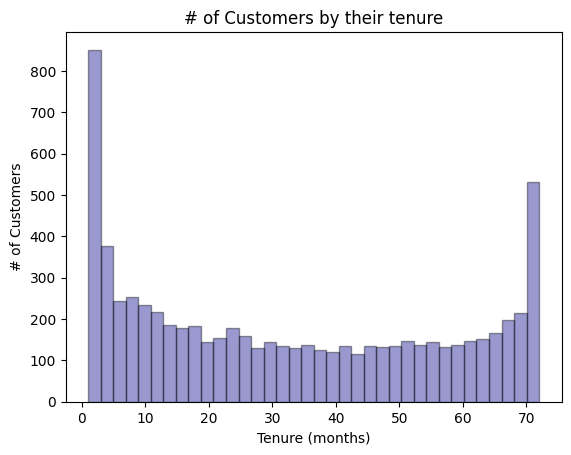

In [ ]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

### E.) **Interaction between the predictor variable (Churn) and other important variables from the correlation plot.**

#### 1. Churn rate

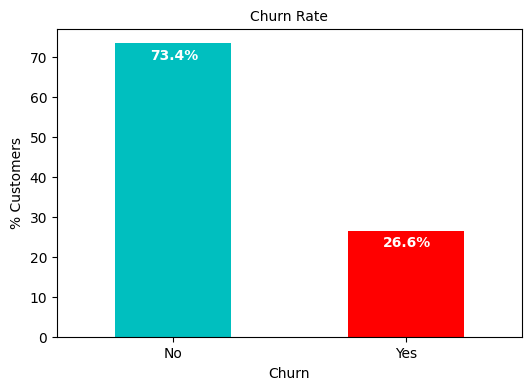

In [ ]:
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = ['c','r'],figsize = (6,4))
ax.set_ylabel('% Customers',size = 10)
ax.set_xlabel('Churn',size = 10)
ax.set_title('Churn Rate', size = 10)

totals = [] # list to collect data from plt.patches data

for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0,str(round((i.get_height()/total), 1))+'%',fontsize=10,color='white',weight = 'bold')

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

#### 2. Churn rate based on tenure, seniority, contract type, monthly charges, and total charges to understand how it varies across these variables.

**i.) Churn vs Tenure**: From the plot below, it is evident that customers who do not churn tend to have longer tenures with the telecom company.

<Axes: xlabel='Churn', ylabel='tenure'>

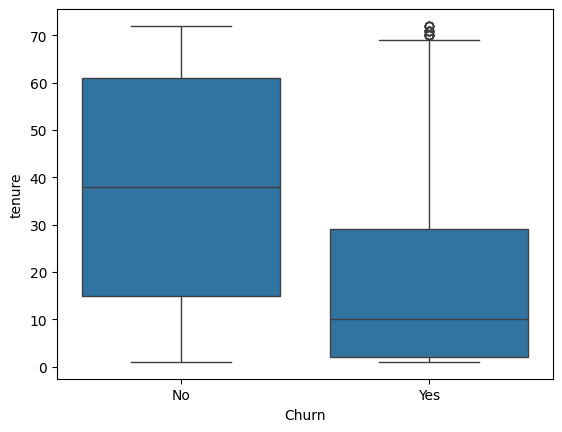

In [ ]:
sns.boxplot(x = df.Churn, y = df.tenure)

**ii.) Churn by Contract Type**: Customers with month-to-month contracts show a notably higher churn rate, as indicated in the correlation plot.

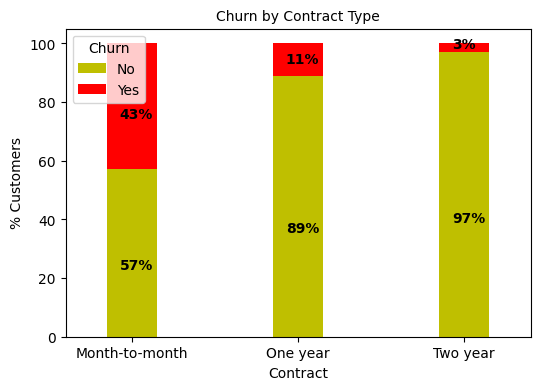

In [ ]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (6,4),color = ['y','r'])
ax.legend(loc='best',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers',size = 10)
ax.set_title('Churn by Contract Type',size = 10)

# Adding data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'Black',weight = 'bold',size = 10)

**iii.) Churn by Seniority**: The churn rate for senior citizens is nearly double compared to the younger population. This suggests that senior citizens are more likely to churn or discontinue their services with the telecom company compared to younger customers.

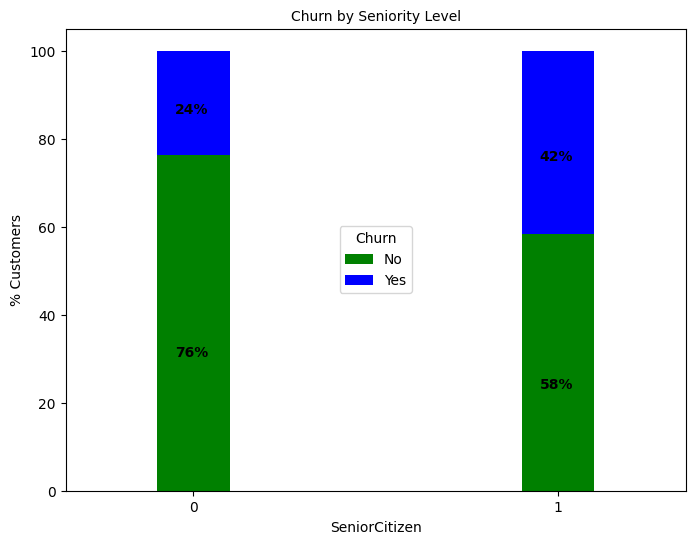

In [ ]:
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6),color = ['g','b'])
ax.legend(loc='center',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 10)

# Adding data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'black', weight = 'bold',size =10)

**iv.) Churn by Monthly Charges**: A higher percentage of customers tend to churn when the monthly charges are high.

<ipython-input-21-f0e93f3d49dd>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],color="Red", shade = True)
<ipython-input-21-f0e93f3d49dd>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],ax =ax, color="Black", shade= True)


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

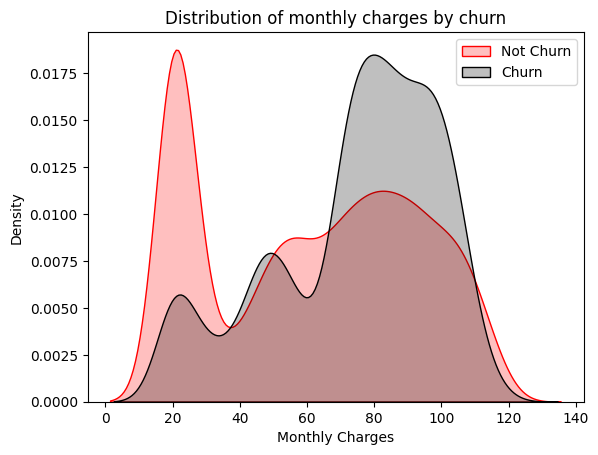

In [ ]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],ax =ax, color="Black", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

**v.) Churn by Total Charges**: It appears that there is a higher churn rate when the total charges are lower.

<ipython-input-22-75f52ee8f799>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],color="Red", shade = True)
<ipython-input-22-75f52ee8f799>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],ax =ax, color="Black", shade= True)


Text(0.5, 1.0, 'Distribution of total charges by churn')

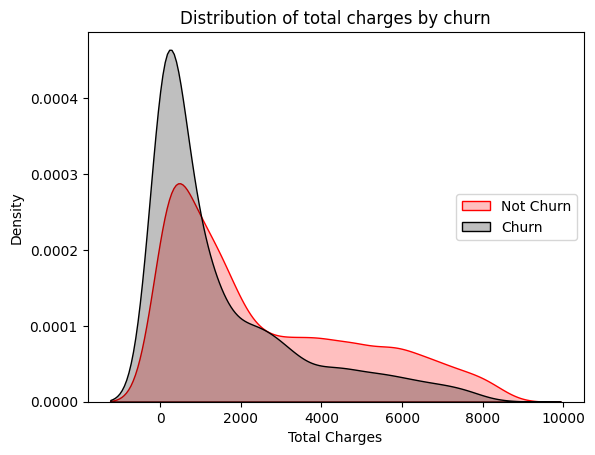

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],ax =ax, color="Black", shade= True)
ax.legend(["Not Churn","Churn"],loc='right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# **Prediction using Different ML Models**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Initialize classifiers with balanced class weights
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000, class_weight='balanced'),
    "Support Vector Machine": SVC(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced')
}

# Train and evaluate each model
results = {}
confusion_matrices = {}
classification_reports = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    # Classification Report
    cr = classification_report(y_test, y_pred)
    classification_reports[name] = cr

# Print results together
print("Evaluation Metrics:")
for name in results.keys():
    print(f"\n{name}:")
    print(f"Accuracy Score: {results[name]}")
    print("Confusion Matrix:")
    print(confusion_matrices[name])
    print("Classification Report:")
    print(classification_reports[name])

Evaluation Metrics:

Logistic Regression:
Accuracy Score: 0.7519908987485779
Confusion Matrix:
[[993 336]
 [100 329]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1329
           1       0.49      0.77      0.60       429

    accuracy                           0.75      1758
   macro avg       0.70      0.76      0.71      1758
weighted avg       0.81      0.75      0.77      1758


Support Vector Machine:
Accuracy Score: 0.7366325369738339
Confusion Matrix:
[[969 360]
 [103 326]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1329
           1       0.48      0.76      0.58       429

    accuracy                           0.74      1758
   macro avg       0.69      0.74      0.70      1758
weighted avg       0.80      0.74      0.75      1758


Random Forest:
Accuracy Score: 0.7929465301478953
Confusion Matrix:
[[1184  145]

Gradient Boosting is best performing model so doing hyperparameter tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=101)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with best parameters on the test set
best_gb_clf = grid_search.best_estimator_
y_pred = best_gb_clf.predict(X_test)

# Calculate accuracy score, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nEvaluation Metrics with Best Parameters:")
print("Accuracy Score:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.9}
Best Score: 0.8031867766216715

Evaluation Metrics with Best Parameters:
Accuracy Score: 0.8156996587030717
Confusion Matrix:
 [[1214  115]
 [ 209  220]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1329
           1       0.66      0.51      0.58       429

    accuracy                           0.82      1758
   macro avg       0.75      0.71      0.73      1758
weighted avg       0.81      0.82      0.81      1758



#**Observations**

##**1.) Based on the analysis and summary of interesting features, we can make the following hypotheses:**

1. Two-month contracts and longer tenure: Customers with a two-month contract and longer tenure are less likely to churn. This suggests that a higher commitment period and longer relationship with the telecom company contribute to customer retention.

2. DSL internet service: Customers with DSL internet service have a lower probability of churn. This could be because DSL is generally considered a more reliable and stable internet connection, leading to higher customer satisfaction and reduced likelihood of switching providers.

3. Total charges, monthly contracts, fiber optic internet service, and seniority: These variables are positively related to churn, meaning that they increase the probability of customers churning. The higher churn rates associated with total charges, monthly contracts, fiber optic internet service, and seniority require further exploration to understand the underlying reasons.

##**2.) Possible hypotheses for further investigation could include:**

1. Total charges: Customers with lower total charges may be more price-sensitive and easily swayed by competitive offers from other providers.

2. Monthly contracts: Customers on monthly contracts have more flexibility to switch providers without penalties, making them more prone to exploring other options.

3. Fiber optic internet service: Although fiber optic services offer faster speeds, there could be underlying issues such as inconsistent service quality or higher pricing associated with fiber optic plans, leading customers to seek alternatives.

4. Seniority: It is possible that senior customers face unique challenges or preferences that contribute to a higher churn rate. This could include changing needs, competitive offers targeting senior citizens, or dissatisfaction with the services provided.

To gain more insights, conducting customer surveys or interviews, analyzing customer complaints or feedback data, and further exploring the specific experiences and reasons behind these correlations would be helpful.